In [21]:
import numpy
import pymongo
import matplotlib.pyplot as plt

In [4]:
# Initial setup
client = pymongo.MongoClient("mongodb://localhost:27017")

In [ ]:
# repos = ['Apache', 'Hyperledger', 'Spring']
# for repo in repos:
repo = 'Apache'

l = []

mdb_db = client[repo]
mdb_col = mdb_db['Sprints']
cursor = mdb_col.find({})
for document in cursor:
    try:
        l.append(document['issues'])
    except KeyError as e:
        continue

C:\Users\Sotse\AppData\Local\Temp\ipykernel_18580\429056759.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  a = numpy.array(l)


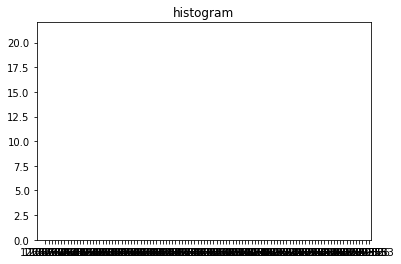

In [26]:
a = numpy.array(l)
plt.hist(a, bins = [0,20,40,60,80,100]) 
# plt.hist(a)
plt.title("histogram") 
plt.show()

In [48]:
ll = []
for i in l:
    if len(i)<50:
        ll.append(len(i))
print(len(l))
print(len(ll))
    

578
491


In [35]:
a = numpy.array(ll)

In [39]:
def reject_outliers(data, m = 2.):
    d = numpy.abs(data - numpy.median(data))
    mdev = numpy.median(d)
    s = d/mdev if mdev else 0.
    return data[s<m]

In [40]:
b = reject_outliers(a)

In [42]:
len(b)

474

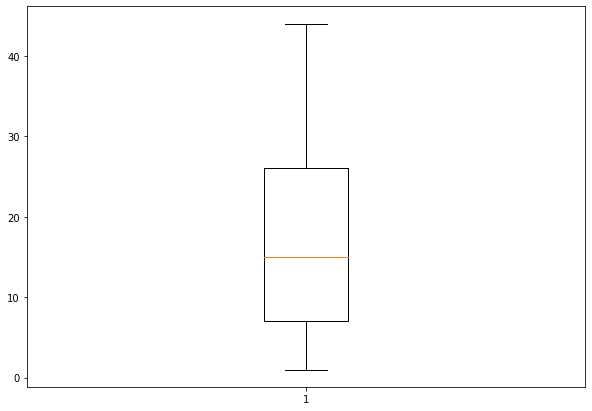

In [44]:
fig = plt.figure(figsize =(10, 7))
 
# Creating plot
plt.boxplot(b)
 
# show plot
plt.show()

{'whiskers': [<matplotlib.lines.Line2D at 0x17696abba00>,
 'caps': [<matplotlib.lines.Line2D at 0x17696abbfa0>,
 'boxes': [<matplotlib.lines.Line2D at 0x17696abb730>],
 'medians': [<matplotlib.lines.Line2D at 0x17696aa9580>],
 'fliers': [<matplotlib.lines.Line2D at 0x17696aa9850>],
 'means': []}

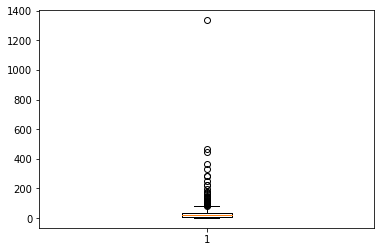

In [45]:
plt.boxplot(a)